<a href="https://colab.research.google.com/github/ckusmana21/programmingDS3001/blob/main/Kusmana_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

QUESTION 1

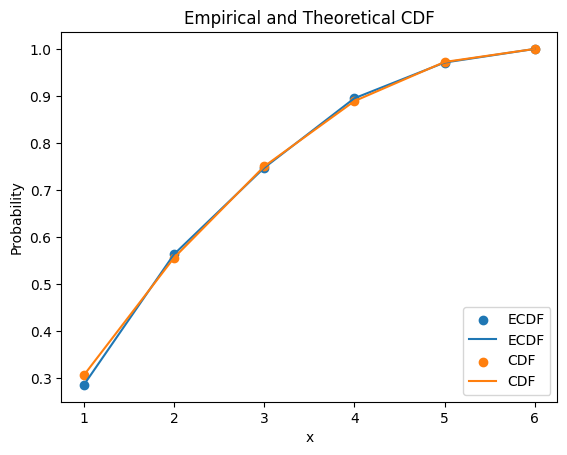

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## 1.
faces = np.array([1,2,3,4,5,6])

# Explicit calculation:
pdf = np.zeros(6)
for i in range(6):
    for j in range(6):
        min_ij = np.min([faces[i],faces[j]])
        pdf[min_ij-1] += 1
pdf = pdf/36
cdf = np.cumsum(pdf)

# Bootstrap simulation:
N = 1000
d1 = np.random.choice(faces, size=N)
d2 = np.random.choice(faces, size=N)
min_roll = [ min([d1[i], d2[i]]) for i in range(N) ]

ecdf = np.zeros(6)
for i in range(6):
    ecdf[i] = (1/N)*np.sum( min_roll <= faces[i] )

# Comparison:
plt.scatter(faces,ecdf,label='ECDF')
plt.plot(faces,ecdf,label='ECDF')
plt.scatter(faces,cdf,label='CDF')
plt.plot(faces,cdf,label='CDF')
plt.xlabel("x")
plt.ylabel("Probability")
plt.legend(loc='lower right')
plt.title('Empirical and Theoretical CDF')
plt.show()


2

Expected value:  3.495


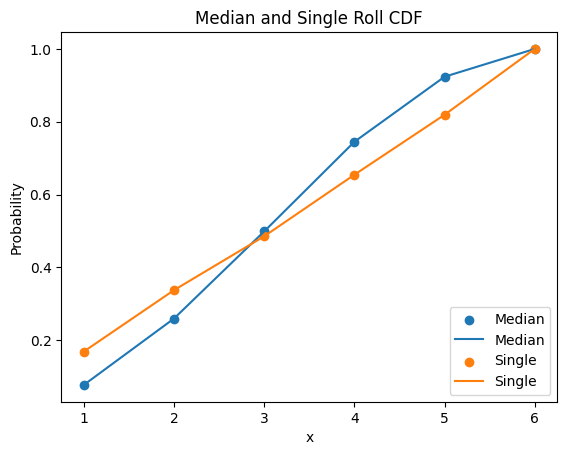

In [2]:
## 2.
faces = np.array([1,2,3,4,5,6])
N = 5000
d1 = np.random.choice(faces, size=N)
d2 = np.random.choice(faces, size=N)
d3 = np.random.choice(faces, size=N)
med_roll = [ int(np.median([d1[i], d2[i], d3[i]])) for i in range(N) ]

expected_value = np.sum(med_roll)/N
print('Expected value: ', expected_value)

ecdf = np.zeros(6)
single = np.zeros(6)
for i in range(6):
    ecdf[i] = (1/N)*np.sum( med_roll <= faces[i] )
    single[i] = (1/N)*np.sum( d1 <= faces[i] )

expected_value = np.sum(med_roll)/N

# # Comparison:
plt.scatter(faces,ecdf,label='Median')
plt.plot(faces,ecdf,label='Median')
plt.scatter(faces,single,label='Single')
plt.plot(faces,single,label='Single')
plt.xlabel("x")
plt.ylabel("Probability")
plt.legend(loc='lower right')
plt.title('Median and Single Roll CDF')
plt.show()


                  0
count  50000.000000
mean       4.190720
std        3.286421
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       35.000000


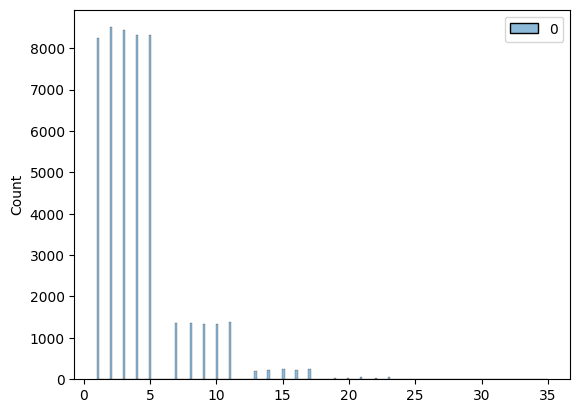

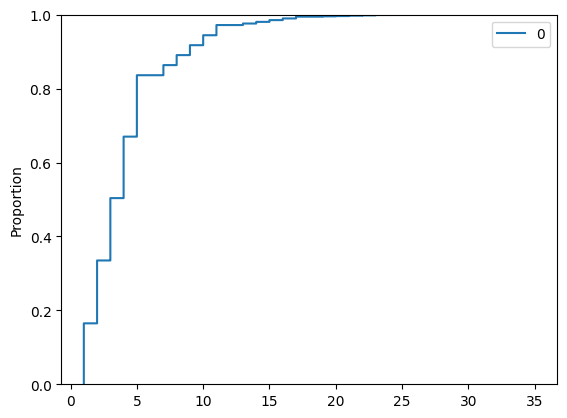

In [3]:
## 3.

N = 50000
results = []
for i in range(N):
    go = True
    sum = 0
    while go is True:
        roll = np.random.choice(faces, size=1)
        sum += roll
        if roll < 6:
            go = False
            results.append(int(sum[0]))

results = pd.DataFrame(results)

print(results.describe())

sns.histplot(results)
plt.show()

sns.ecdfplot(results)
plt.show()


QUESTION 2

In [ ]:
df = pd.read_csv('./data/mammogram.csv')

## 1.

print( pd.crosstab( df['treatment'], df['breast_cancer_death']) , '\n')
print( pd.crosstab( df['treatment'], df['breast_cancer_death'], margins=True, normalize=True) , '\n')

raw_treatment_effect = 44425/44925 - 44405/44910
print('Raw treatment effect: ', raw_treatment_effect)

## 2.

df['survive'] = 0
df.loc[ df['breast_cancer_death'] == 'no', 'survive'] = 1

df_treat = df.loc[ df['treatment'] == 'mammogram', :]
df_control = df.loc[ df['treatment'] == 'control', :]

S = 5000
fx = []
for t in range(S):
    df_treat_t = df_treat.sample( df_treat.shape[0], axis=0, replace=True)
    df_control_t = df_control.sample( df_control.shape[0], axis=0, replace=True)
    #
    treatment_effect_t = np.mean(df_treat_t['survive']) - np.mean(df_control_t['survive'])
    fx.append(treatment_effect_t)

sns.kdeplot(fx)
plt.show()

sns.ecdfplot(fx)
plt.show()

## 3.
level = .99
lower_bound = np.quantile(fx, .005 )
upper_bound = np.quantile(fx, .995)

print('99% confidence interval: (', lower_bound, ', ', upper_bound, ')' )


So the 99% confidence interval includes zero, suggesting that getting a mammogram does not result in a statistically signficant different in 25-year survival rates. Of course, we are just playing with data: I am not seriously suggesting that mammograms shouldn't be subsidized or used as a regular diagnostic procedure. If we did take these results seriously, we might want to ask some follow-up questions: Were the mammograms randomly assigned or not? If there's selection into getting a mammogram by people who are wealthier and have better health overall, the prevalence of breast cancer might be lower in the treatment group than the control group, making it appear that mammograms aren't useful. Likewise, are there other significant risk factors that cause breast cancer? It might be true that mammograms appear ineffective in reducing breast cancer mortality rates at the population level, but for some sub-populations or high-risk groups, it might be a very effective intervention. Finally, this only considers mortality: It might be the case that other measures of quality of life are significantly improved by catching breast cancer earlier. For example, the survival rate might be similar between the two groups, but the treatment group underwent chemotherapy much less often. There are just the issues I can think of, and I am sure an oncologist could bring up many others. Nevertheless, this is the kind of analysis we do to try to understand whether treatments work or not: What's the distribution of the treatment effect, and is zero a plausible value?

